In [ ]:
import pandas as pd
dfa = pd.read_fwf('COLVAR_2', colspecs='infer', header=None)

In [2]:
dfa

,0,1,2,3
0,0.00,-2.856560,2.790903,0.00
1,0.01,-2.849088,2.876062,0.00
2,0.02,-2.888908,2.826075,0.00
3,0.03,-2.828423,2.719874,0.00
4,0.04,-2.807151,2.725377,0.00
...,...,...,...,...
499996,4999.96,0.712800,-0.975300,236.83
499997,4999.97,0.908800,-1.116600,244.99
499998,4999.98,1.005600,-1.252200,249.59
499999,4999.99,0.969500,-1.268900,248.80


In [3]:
pe = pd.read_fwf('totE_MD.txt', colspecs='infer', header=None)

In [4]:
pe

,0
0,-712.7067
1,-712.7036
2,-712.6987
3,-712.6976
4,-712.7015
...,...
4999996,-712.4626
4999997,-712.4666
4999998,-712.4699
4999999,-712.4711


In [5]:
def generate_interval(n, total_rows):
    index = []
    start = 0
    n_rows = int(total_rows/n)
    for i in range(n_rows+1):
        index.append(start)
        start +=  int(n)
    return index
a = generate_interval(10,5000000)
pe = pe.loc[a[0:-1]]
pe.info

<bound method DataFrame.info of                 0
0       -712.7067
10      -712.7008
20      -712.6887
30      -712.6722
40      -712.6379
...           ...
4999950 -712.5229
4999960 -712.4224
4999970 -712.4507
4999980 -712.4620
4999990 -712.4442

[500000 rows x 1 columns]>

In [6]:
dfa = dfa.drop(labels=500000, axis=0)
dfa.info

<bound method DataFrame.info of               0         1         2       3
0          0.00 -2.856560  2.790903    0.00
1          0.01 -2.849088  2.876062    0.00
2          0.02 -2.888908  2.826075    0.00
3          0.03 -2.828423  2.719874    0.00
4          0.04 -2.807151  2.725377    0.00
...         ...       ...       ...     ...
499995  4999.95  0.724200 -1.056600  238.44
499996  4999.96  0.712800 -0.975300  236.83
499997  4999.97  0.908800 -1.116600  244.99
499998  4999.98  1.005600 -1.252200  249.59
499999  4999.99  0.969500 -1.268900  248.80

[500000 rows x 4 columns]>

In [7]:
dfa[4] = pe[0].values
dfa

,0,1,2,3,4
0,0.00,-2.856560,2.790903,0.00,-712.7067
1,0.01,-2.849088,2.876062,0.00,-712.7008
2,0.02,-2.888908,2.826075,0.00,-712.6887
3,0.03,-2.828423,2.719874,0.00,-712.6722
4,0.04,-2.807151,2.725377,0.00,-712.6379
...,...,...,...,...,...
499995,4999.95,0.724200,-1.056600,238.44,-712.5229
499996,4999.96,0.712800,-0.975300,236.83,-712.4224
499997,4999.97,0.908800,-1.116600,244.99,-712.4507
499998,4999.98,1.005600,-1.252200,249.59,-712.4620


In [8]:
dfa[4].min()-dfa[4].max()

-2.2065000000000055

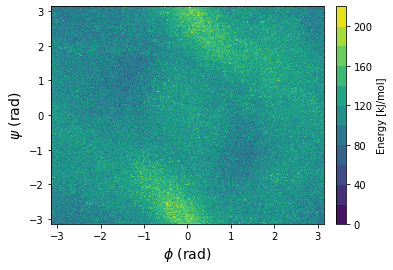

In [9]:
import matplotlib.pyplot as plt
phi, psi, free = dfa[1], dfa[2], dfa[4]
free = free*96.49
free = free - min(free)
plt.xlabel(r'$\phi$ (rad)', fontsize=14)
plt.ylabel(r'$\psi$ (rad)', fontsize=14)
#plt.scatter(phi, psi, marker='x', s=0.2, c=free )
#plt.tricontour(phi, psi, free, lw=4)
plt.tricontourf(phi, psi, free, 10)
#plt.contourf(X, Y, Z, 20, cmap='RdGy')
#plt.legend(loc=0)
cbar = plt.colorbar(pad=0.035)
cbar.set_label('Energy [kJ/mol]')
plt.show()

In [10]:
pe_range = -dfa[4].min()+dfa[4].max()
print ('PE range is %.2f eV'%pe_range)

PE range is 2.21 eV


In [11]:
import numpy as np
phi_new = np.linspace(-np.pi, np.pi, 51)
phi_new.round(2)

array([-3.14, -3.02, -2.89, -2.76, -2.64, -2.51, -2.39, -2.26, -2.14,
       -2.01, -1.88, -1.76, -1.63, -1.51, -1.38, -1.26, -1.13, -1.01,
       -0.88, -0.75, -0.63, -0.5 , -0.38, -0.25, -0.13,  0.  ,  0.13,
        0.25,  0.38,  0.5 ,  0.63,  0.75,  0.88,  1.01,  1.13,  1.26,
        1.38,  1.51,  1.63,  1.76,  1.88,  2.01,  2.14,  2.26,  2.39,
        2.51,  2.64,  2.76,  2.89,  3.02,  3.14])

In [12]:
angles = np.linspace(-np.pi, np.pi, 51)
angles = np.round(angles,2)
anglesc1= angles[0:26] + 0.02 
anglesc2 = angles[26:] - 0.02
anglesc = list(anglesc1) + list(anglesc2)
anglesc = np.array(anglesc)
anglesc = np.round(anglesc,2) # earlier rounded to 1 decimal place

In [13]:
tol1 = 0.01
tol2 = 0.02
tol3 = 0.03
tol4 = 0.04
tol5 = 0.05
tol6 = 0.06
dic2 = {}
dic3 = {}
for z in range(51):
    tes01 = pd.read_csv("te_"+str(z)+".csv", header = None)
    level = 'level%d' %z
    dic1 = []
    dic2[level] = {}
    dic3[level] = {}
    for j in range(len(anglesc)):
        for i in range(len(tes01[0])):
            rphi = tes01[3].round(2)[i]
            #if (rphi==angles[j] or rphi==(angles[j]-tol2)):
            if (rphi==angles[j] or rphi==angles[j]+tol1 or rphi==angles[j]+tol2 or rphi==angles[j]+tol3 or \
               rphi==angles[j]+tol4 or rphi==angles[j]+tol5 or rphi==angles[j]+tol6 or \
               rphi==angles[j]-tol1 or rphi==angles[j]-tol2 or rphi==angles[j]-tol3 or \
               rphi==angles[j]-tol4 or rphi==angles[j]-tol5 or rphi==angles[j]-tol6):
                dic1.append(tes01[5][i])
            # if ((tes01[3].round(2)[i]==((anglesc[j]-tol1) or (anglesc[j]+tol1))) or tes01[3].round(2)[i]==((anglesc[j]-tol1-tol2) or (anglesc[j]+tol1+tol2))\
            #   or (tes01[3].round(2)[i]==((anglesc[j]-tol3) or (anglesc[j]+tol3))) or (tes01[3].round(2)[i]==((anglesc[j]-tol4) or (anglesc[j]+tol4))) ):
            #        dic1.append(tes01[5][i])
        dic2[level][angles[z],angles[j]]=np.mean(dic1)
        #dic3[level][angles[z],angles[j]]=np.min(dic1)
        dic1 = []

#            if ((tes01[3].round(2)[i]==((anglesc[j]-tol1) or (anglesc[j]+tol1))) or tes01[2].round(2)[i]==((anglesc[j]-tol1-tol2) or (anglesc[j]+tol1+tol2))\
#               or (tes01[3].round(2)[i]==((anglesc[j]-tol3) or (anglesc[j]+tol3))) or (tes01[3].round(2)[i]==((anglesc[j]-tol4) or (anglesc[j]+tol4))) ):

C:\Anaconda4\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Anaconda4\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [109]:
ndca = pd.DataFrame()
ndcm = pd.DataFrame()
for i in range(51):
    ndca[i] = (dic2['level%d'%i].values())
    ndcm[i] = (dic3['level%d'%i].values())
ndca

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,-712.654150,-712.652133,-712.554450,-712.619225,-712.622960,-712.427300,-712.628667,NaN,-712.565333,-712.600400,...,-712.464540,-712.370433,-712.447167,-712.298120,-712.505025,-712.576125,-712.308425,-712.648150,-712.495900,-712.795733
1,-712.529789,-712.566912,-712.631500,-712.549600,-712.641255,-712.602825,-712.540017,-712.578727,-712.465038,-712.558688,...,-712.342445,-712.379480,-712.329892,-712.509100,-712.386292,-712.338408,-712.522678,-712.452623,-712.551879,-712.623015
2,-712.511700,-712.470876,-712.581535,-712.572833,-712.632064,-712.600100,-712.442344,-712.604917,-712.623500,-712.437333,...,-712.397285,-712.510675,-712.424973,-712.495386,-712.420715,-712.506200,-712.505433,-712.633133,-712.539250,-712.599018
3,-712.759333,-712.553708,-712.585017,-712.566592,-712.564911,-712.532771,-712.543078,-712.589531,-712.585987,-712.425540,...,-712.491317,-712.375917,-712.432037,-712.466614,-712.343263,-712.572650,-712.485636,-712.593600,-712.625100,-712.492075
4,-712.543550,-712.576358,-712.452846,-712.493142,-712.503213,-712.533889,-712.549894,-712.399329,-712.440277,-712.494118,...,-712.403493,-712.364100,-712.423656,-712.385064,-712.372323,-712.435444,-712.482918,-712.401958,-712.500577,-712.541225
5,-712.598071,-712.526291,-712.534500,-712.578967,-712.385330,-712.484660,-712.539458,-712.356030,-712.490615,-712.461022,...,-712.411182,-712.288883,-712.454300,-712.334627,-712.492327,-712.533100,-712.579911,-712.449100,-712.421100,-712.505133
6,-712.402420,-712.514588,-712.423433,-712.416891,-712.500800,-712.538700,-712.295218,-712.386017,-712.446450,-712.385350,...,-712.407505,-712.391067,-712.351400,-712.477943,-712.374414,-712.346643,-712.393774,-712.425686,-712.484520,-712.398936
7,-712.417000,-712.529067,-712.460392,-712.504083,-712.432257,-712.313111,-712.414155,-712.363727,-712.550589,-712.358367,...,-712.428600,-712.557700,-712.343900,-712.414955,-712.306200,-712.313086,-712.401329,-712.372940,-712.402500,-712.377800
8,-712.429813,-712.411017,-712.399518,-712.447542,-712.457564,-712.445331,-712.401620,-712.352462,-712.366062,-712.356000,...,-712.344545,-712.399371,-712.413967,-712.275357,-712.386600,-712.407980,-712.571922,-712.410576,-712.427164,-712.423500
9,-712.465467,-712.428767,-712.346533,-712.561100,-712.396980,-712.396288,-712.318257,-712.436333,-712.258500,-712.186420,...,-712.454267,-712.461240,-712.354925,-712.449540,-712.211350,-712.336483,-712.464500,-712.308000,-712.514929,-712.595350


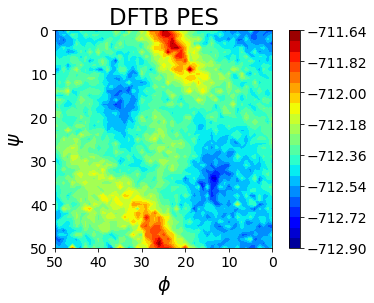

In [114]:
plt.contourf(ndca,20,cmap='jet')
ax=plt.gca()
ax.set_aspect('equal')
plt.title('DFTB PES')
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.colorbar()
plt.show()

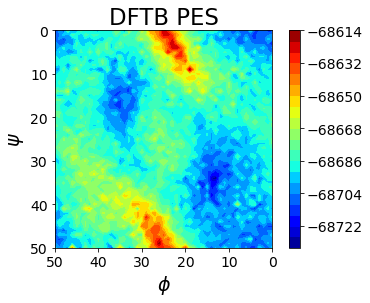

In [115]:
#ndcaa = ndca #- min(ndca)
ndcaa = ndca*96.42 
plt.contourf(ndcaa, 20,cmap='jet', corner_mask = True, alpha = 1)
ax=plt.gca()
ax.set_aspect('equal')
plt.title('DFTB PES')
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.colorbar()
plt.show()

In [98]:
m = ndca.isnull().values.any()
ss = ndca.isnull().sum()
ss
ndca[7], ndca[20], ndca[27], ndca[30]


(0            NaN
 1    -712.578727
 2    -712.604917
 3    -712.589531
 4    -712.399329
 5    -712.356030
 6    -712.386017
 7    -712.363727
 8    -712.352462
 9    -712.436333
 10   -712.206450
 11   -712.261346
 12   -712.480357
 13   -712.464058
 14   -712.328594
 15   -712.466194
 16   -712.487744
 17   -712.345411
 18   -712.395428
 19   -712.326006
 20   -712.378845
 21   -712.401226
 22   -712.424517
 23   -712.515681
 24   -712.427862
 25   -712.461331
 26   -712.446580
 27   -712.516900
 28   -712.431215
 29   -712.472167
 30   -712.506655
 31   -712.539683
 32   -712.511144
 33   -712.507233
 34   -712.406878
 35   -712.530818
 36   -712.550822
 37   -712.477082
 38   -712.580100
 39   -712.543109
 40   -712.518958
 41   -712.444367
 42   -712.574100
 43   -712.456300
 44   -712.417500
 45   -712.438850
 46   -712.505700
 47   -712.649689
 48   -712.528687
 49   -712.578100
 50   -712.627300
 Name: 7, dtype: float64,
 0    -712.115917
 1    -712.222615
 2    -712.131421
 3

In [ ]:
ndca[7][0], ndca[20][9], ndca[27][47], ndca[30][43]

In [113]:
ndca[7][0] = ndca[7][1] - 0.01
ndca[20][9] = ndca[20][10] - 0.01
ndca[27][47] = ndca[27][48] - 0.01
ndca[30][43] = ndca[30][44] - 0.01

In [84]:
ndca

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,-712.654150,-712.652133,-712.554450,-712.619225,-712.622960,-712.427300,-712.628667,-712.588727,-712.565333,-712.600400,...,-712.464540,-712.370433,-712.447167,-712.298120,-712.505025,-712.576125,-712.308425,-712.648150,-712.495900,-712.795733
1,-712.529789,-712.566912,-712.631500,-712.549600,-712.641255,-712.602825,-712.540017,-712.578727,-712.465038,-712.558688,...,-712.342445,-712.379480,-712.329892,-712.509100,-712.386292,-712.338408,-712.522678,-712.452623,-712.551879,-712.623015
2,-712.511700,-712.470876,-712.581535,-712.572833,-712.632064,-712.600100,-712.442344,-712.604917,-712.623500,-712.437333,...,-712.397285,-712.510675,-712.424973,-712.495386,-712.420715,-712.506200,-712.505433,-712.633133,-712.539250,-712.599018
3,-712.759333,-712.553708,-712.585017,-712.566592,-712.564911,-712.532771,-712.543078,-712.589531,-712.585987,-712.425540,...,-712.491317,-712.375917,-712.432037,-712.466614,-712.343263,-712.572650,-712.485636,-712.593600,-712.625100,-712.492075
4,-712.543550,-712.576358,-712.452846,-712.493142,-712.503213,-712.533889,-712.549894,-712.399329,-712.440277,-712.494118,...,-712.403493,-712.364100,-712.423656,-712.385064,-712.372323,-712.435444,-712.482918,-712.401958,-712.500577,-712.541225
5,-712.598071,-712.526291,-712.534500,-712.578967,-712.385330,-712.484660,-712.539458,-712.356030,-712.490615,-712.461022,...,-712.411182,-712.288883,-712.454300,-712.334627,-712.492327,-712.533100,-712.579911,-712.449100,-712.421100,-712.505133
6,-712.402420,-712.514588,-712.423433,-712.416891,-712.500800,-712.538700,-712.295218,-712.386017,-712.446450,-712.385350,...,-712.407505,-712.391067,-712.351400,-712.477943,-712.374414,-712.346643,-712.393774,-712.425686,-712.484520,-712.398936
7,-712.417000,-712.529067,-712.460392,-712.504083,-712.432257,-712.313111,-712.414155,-712.363727,-712.550589,-712.358367,...,-712.428600,-712.557700,-712.343900,-712.414955,-712.306200,-712.313086,-712.401329,-712.372940,-712.402500,-712.377800
8,-712.429813,-712.411017,-712.399518,-712.447542,-712.457564,-712.445331,-712.401620,-712.352462,-712.366062,-712.356000,...,-712.344545,-712.399371,-712.413967,-712.275357,-712.386600,-712.407980,-712.571922,-712.410576,-712.427164,-712.423500
9,-712.465467,-712.428767,-712.346533,-712.561100,-712.396980,-712.396288,-712.318257,-712.436333,-712.258500,-712.186420,...,-712.454267,-712.461240,-712.354925,-712.449540,-712.211350,-712.336483,-712.464500,-712.308000,-712.514929,-712.595350


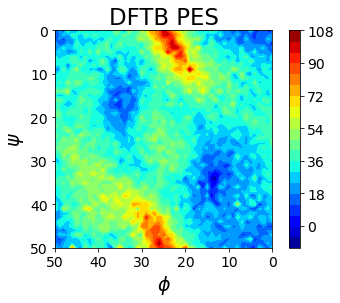

In [124]:
#ndcaa = ndca #- min(ndca)
ndcaa = ndca*96.42 + 68722
plt.contourf(ndcaa, 20,cmap='jet', corner_mask = True, alpha = 1)
ax=plt.gca()
ax.set_aspect('equal')
plt.title('DFTB PES')
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.colorbar()
plt.show()

# Working

In [125]:
x = np.linspace(np.pi, -np.pi, 51)
y= x

<ipython-input-126-6695cf72e660>:34: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(newx,newy,pes,vmin=0,vmax=120,cmap='jet')
<ipython-input-126-6695cf72e660>:60: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(Xplot,Yplot,np.flipud(np.fliplr(Zinterp(Xplot,Yplot))),vmin=0,vmax=120,cmap='jet')
<ipython-input-126-6695cf72e660>:96: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated si

Text(0.5, 1.0, 'DFTB PES AVERAGE')

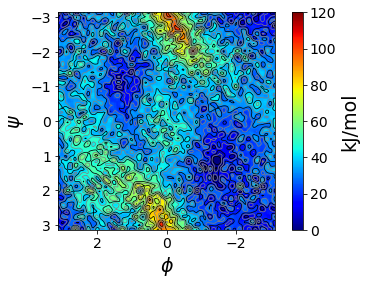

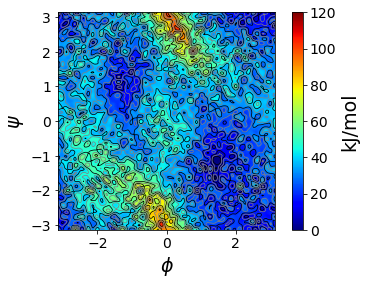

<Figure size 432x288 with 0 Axes>

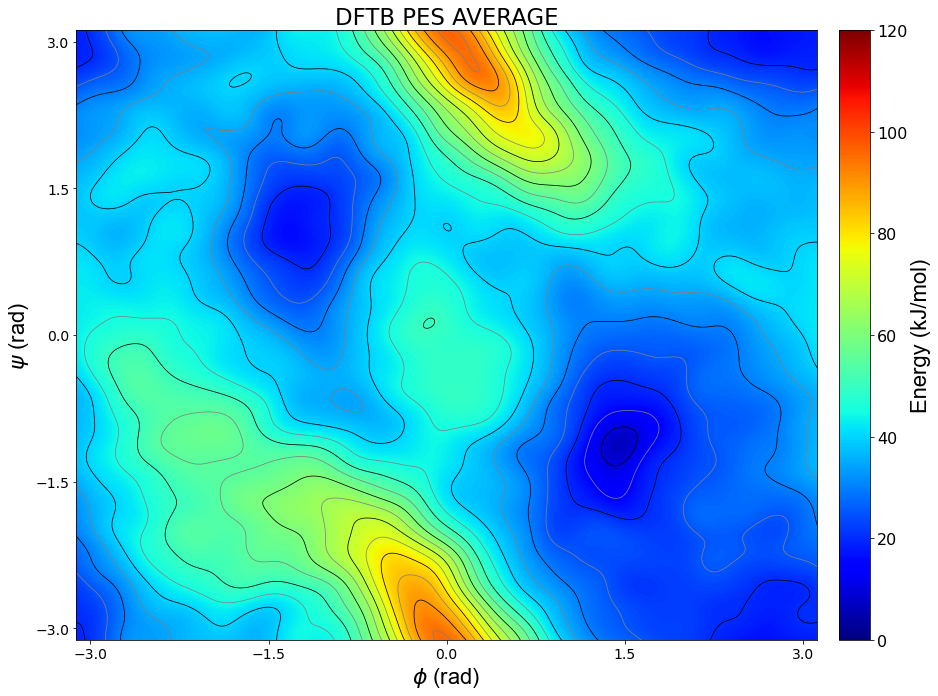

In [126]:
unique1, counts = np.unique(x,return_counts=True)
n1=len(unique1)
unique2, counts = np.unique(y.T,return_counts=True)
n2=len(unique2)
fes=ndcaa

##mn=np.amin(fes)
#fes=(fes-mn)*96.49
fes1 = fes.copy()
import scipy.ndimage
import matplotlib
import scipy.ndimage.filters as filters
xlabel = '$\phi$ (rad)'
ylabel = '$\psi$ (rad)'
ylabel_fsize = 46
xlabel_fsize = 46
ytick_labelsize = 36
xtick_labelsize = 36
colorbar_fsize = 42
ylabel_fsize = 46
xlabel_fsize = 46
ytick_labelsize = 36
xtick_labelsize = 36
colorbar_labelsize = 27
pad_colorbar = 0.025
vmax = 120
fontweight = 'normal'
pes = fes
pes = scipy.ndimage.zoom(pes, 3)
newx=np.linspace(-np.pi,np.pi,pes.shape[0])
newy=np.linspace(-np.pi,np.pi,pes.shape[1])
xtick_labelsize = 14
ytick_labelsize = 14
plt.figure(2)

ax=plt.gca()
ax.set_aspect('equal')

plt.axis([np.amin(newx),np.amax(newx),np.amin(newy),np.amax(newy)])
plt.pcolormesh(newx,newy,pes,vmin=0,vmax=120,cmap='jet')
plt.colorbar(label='kJ/mol',ticks=[0,20,40,60,80,100,120])

c_black=np.linspace(0,100,11)
g_black=c_black+5

plt.contour(newx,newy,pes,c_black,colors='black',linewidths=0.75)
plt.contour(newx,newy,pes,g_black,colors='grey',linewidths=0.75)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
#plt.show()
#plt.savefig('pbe_pes.png',dpi=300,bbox_inches='tight')

import scipy.interpolate as interp
X,Y = np.meshgrid(np.linspace(np.min(newx),np.max(newx),pes.shape[0]),np.linspace(np.min(newy),np.max(newy),pes.shape[0]))
Xplot,Yplot = np.meshgrid(np.linspace(np.min(newx),np.max(newx),500),np.linspace(np.min(newy),np.max(newy),500))
XY = np.vstack((np.ravel(X),np.ravel(Y)))
Zinterp = interp.LinearNDInterpolator(XY.T,np.ravel(pes))

plt.figure(3)
ax=plt.gca()
ax.set_aspect('equal')
plt.axis([np.amin(Xplot),np.amax(Xplot),np.amin(Yplot),np.amax(Yplot)])
plt.pcolormesh(Xplot,Yplot,np.flipud(np.fliplr(Zinterp(Xplot,Yplot))),vmin=0,vmax=120,cmap='jet')
plt.colorbar(label='kJ/mol')
c_black=np.linspace(0,100,11)
g_black=c_black+5

plt.contour(Xplot,Yplot,np.flipud(np.fliplr(Zinterp(Xplot,Yplot))),c_black,colors='black',linewidths=0.75)
plt.contour(Xplot,Yplot,np.flipud(np.fliplr(Zinterp(Xplot,Yplot))),g_black,colors='grey',linewidths=0.75)

plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.figure(4)

font = {'family' : 'normal',
        'size'   : 19}

matplotlib.rc('font', **font)

plt.figure(figsize=(14,9.8))
plt.gca()
plt.yticks([-3.0, -1.5, 0, 1.5, 3.0], size=ytick_labelsize)
plt.xticks([-3.0, -1.5, 0, 1.5, 3.0], size=xtick_labelsize)
plt.rc('xtick', labelsize=xtick_labelsize)
plt.rc('ytick', labelsize=ytick_labelsize)
plt.xlabel(xlabel, fontsize=xlabel_fsize, fontname = 'Arial', fontweight=fontweight)
plt.ylabel(ylabel, fontsize=ylabel_fsize, fontname = 'Arial', fontweight=fontweight)


# plt.xlabel('$\phi$')
# plt.ylabel('$\psi$')
# ax=plt.gca()
# ax.set_aspect('equal')

#filtermatrix = np.ones((25,25))/np.power(25,2)
#Zconv=conv.convolve2d(Z.T,filtermatrix,boundary='wrap',mode='same')
Zconv = filters.gaussian_filter(np.flipud(np.fliplr(Zinterp(Xplot,Yplot))),12,mode='wrap')/92*102
plt.axis([np.amin(Xplot),np.amax(Xplot),np.amin(Yplot),np.amax(Yplot)])
plt.pcolormesh(Xplot,Yplot,Zconv,vmin=0,vmax=120,cmap='jet')
cbar2 = plt.colorbar(orientation="vertical", shrink=1, pad=0.025)
cbar2.ax.tick_params(labelsize=colorbar_labelsize)
cbar2.set_ticks(list(np.arange(0,vmax+20,20)))
cbar2.set_label('Energy (kJ/mol)', fontname = 'Arial', fontsize = colorbar_fsize, fontweight=fontweight)
#plt.colorbar(label='kJ/mol')
plt.contour(Xplot,Yplot,Zconv,c_black,colors='black',linewidths=0.75)
plt.contour(Xplot,Yplot,Zconv,g_black,colors='grey',linewidths=0.75)

plt.yticks([-3.0, -1.5, 0, 1.5, 3.0], size=ytick_labelsize)
plt.xticks([-3.0, -1.5, 0, 1.5, 3.0], size=xtick_labelsize)
plt.rc('xtick', labelsize=xtick_labelsize)
plt.rc('ytick', labelsize=ytick_labelsize)
plt.xlabel(xlabel, fontsize=xlabel_fsize, fontname = 'Arial', fontweight=fontweight)
plt.ylabel(ylabel, fontsize=ylabel_fsize, fontname = 'Arial', fontweight=fontweight)

# plt.scatter(-2.8,2.9,c='r',marker='o',s=150)
# plt.scatter(-1.5,1.5,c='r',marker='s',s=150)
# plt.scatter(1.25,-0.95,c='r',marker='v',s=150)
plt.ylim(-3.12, 3.12)
plt.xlim(-3.12, 3.12)
plt.tight_layout()
#plt.title('DFTB PES AVERAGE')
plt.savefig('DFTB_PES_adp_5.png', dpi=50, bbox_inches='tight')

<ipython-input-137-e98297d35dfa>:38: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(newx,newy,pes,vmin=0,vmax=120,cmap='jet')
<ipython-input-137-e98297d35dfa>:64: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(Xplot,Yplot,np.flipud(np.fliplr(Zinterp(Xplot,Yplot))),vmin=0,vmax=120,cmap='jet')
<ipython-input-137-e98297d35dfa>:96: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated si

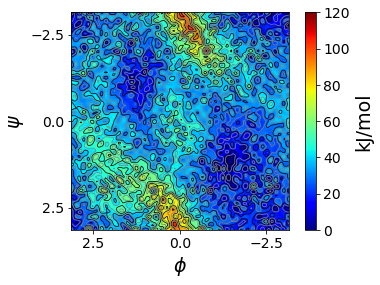

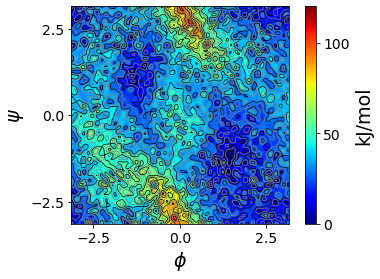

<Figure size 432x288 with 0 Axes>

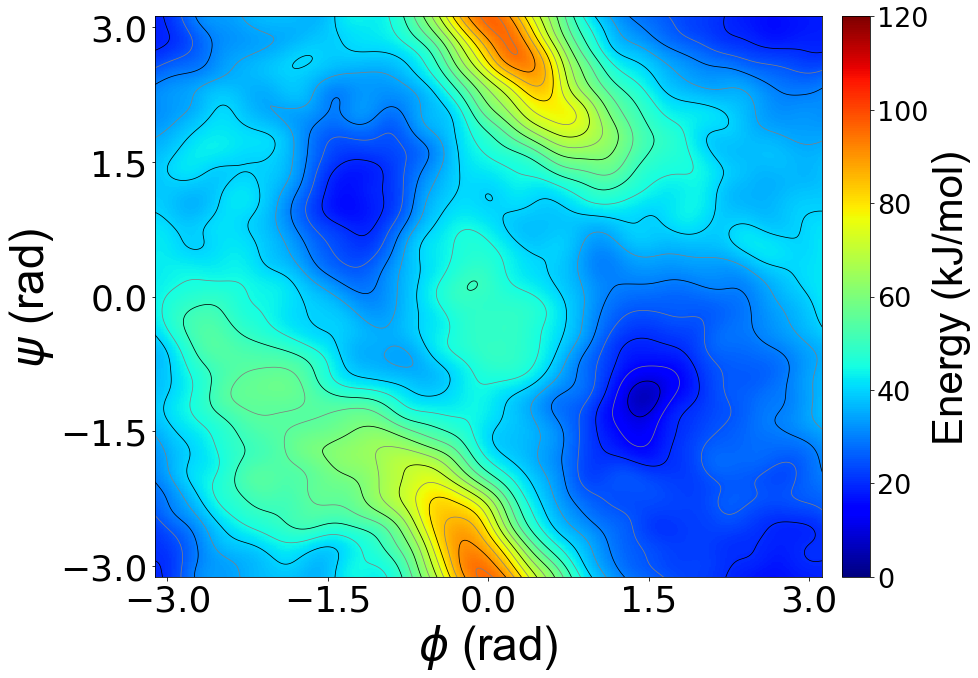

In [137]:
unique1, counts = np.unique(x,return_counts=True)
n1=len(unique1)
unique2, counts = np.unique(y.T,return_counts=True)
n2=len(unique2)
fes=ndcaa

##mn=np.amin(fes)
#fes=(fes-mn)*96.49
fes1 = fes.copy()
import scipy.ndimage
import matplotlib
import scipy.ndimage.filters as filters
xlabel = '$\phi$ (rad)'
ylabel = '$\psi$ (rad)'
ylabel_fsize = 46
xlabel_fsize = 46
ytick_labelsize = 36
xtick_labelsize = 36
colorbar_fsize = 42
ylabel_fsize = 46
xlabel_fsize = 46
ytick_labelsize = 36
xtick_labelsize = 36
colorbar_labelsize = 27
pad_colorbar = 0.025
vmax = 120
fontweight = 'normal'
pes = fes
pes = scipy.ndimage.zoom(pes, 3)
newx=np.linspace(-np.pi,np.pi,pes.shape[0])
newy=np.linspace(-np.pi,np.pi,pes.shape[1])
plt.figure(2)

ax=plt.gca()
ax.set_aspect('equal')

plt.axis([np.amin(newx),np.amax(newx),np.amin(newy),np.amax(newy)])
plt.pcolormesh(newx,newy,pes,vmin=0,vmax=120,cmap='jet')
plt.colorbar(label='kJ/mol',ticks=[0,20,40,60,80,100,120])

c_black=np.linspace(0,100,11)
g_black=c_black+5

plt.contour(newx,newy,pes,c_black,colors='black',linewidths=0.75)
plt.contour(newx,newy,pes,g_black,colors='grey',linewidths=0.75)
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
#plt.show()
#plt.savefig('pbe_pes.png',dpi=300,bbox_inches='tight')

import scipy.interpolate as interp
X,Y = np.meshgrid(np.linspace(np.min(newx),np.max(newx),pes.shape[0]),np.linspace(np.min(newy),np.max(newy),pes.shape[0]))
Xplot,Yplot = np.meshgrid(np.linspace(np.min(newx),np.max(newx),500),np.linspace(np.min(newy),np.max(newy),500))
XY = np.vstack((np.ravel(X),np.ravel(Y)))
Zinterp = interp.LinearNDInterpolator(XY.T,np.ravel(pes))

plt.figure(3)
ax=plt.gca()
ax.set_aspect('equal')
plt.axis([np.amin(Xplot),np.amax(Xplot),np.amin(Yplot),np.amax(Yplot)])
plt.pcolormesh(Xplot,Yplot,np.flipud(np.fliplr(Zinterp(Xplot,Yplot))),vmin=0,vmax=120,cmap='jet')
plt.colorbar(label='kJ/mol')
c_black=np.linspace(0,100,11)
g_black=c_black+5

plt.contour(Xplot,Yplot,np.flipud(np.fliplr(Zinterp(Xplot,Yplot))),c_black,colors='black',linewidths=0.75)
plt.contour(Xplot,Yplot,np.flipud(np.fliplr(Zinterp(Xplot,Yplot))),g_black,colors='grey',linewidths=0.75)

plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.figure(4)

plt.figure(figsize=(14,9.8))
plt.gca()
plt.yticks([-3.0, -1.5, 0, 1.5, 3.0], size=ytick_labelsize)
plt.xticks([-3.0, -1.5, 0, 1.5, 3.0], size=xtick_labelsize)
plt.rc('xtick', labelsize=xtick_labelsize)
plt.rc('ytick', labelsize=ytick_labelsize)
plt.xlabel(xlabel, fontsize=xlabel_fsize, fontname = 'Arial', fontweight=fontweight)
plt.ylabel(ylabel, fontsize=ylabel_fsize, fontname = 'Arial', fontweight=fontweight)
plt.rc('xtick', labelsize=xtick_labelsize)
plt.rc('ytick', labelsize=ytick_labelsize)

# plt.xlabel('$\phi$')
# plt.ylabel('$\psi$')
# ax=plt.gca()
# ax.set_aspect('equal')

#filtermatrix = np.ones((25,25))/np.power(25,2)
#Zconv=conv.convolve2d(Z.T,filtermatrix,boundary='wrap',mode='same')
Zconv = filters.gaussian_filter(np.flipud(np.fliplr(Zinterp(Xplot,Yplot))),12,mode='wrap')/92*102
plt.axis([np.amin(Xplot),np.amax(Xplot),np.amin(Yplot),np.amax(Yplot)])
plt.pcolormesh(Xplot,Yplot,Zconv,vmin=0,vmax=120,cmap='jet')
cbar2 = plt.colorbar(orientation="vertical", shrink=1, pad=0.025)
cbar2.ax.tick_params(labelsize=colorbar_labelsize)
cbar2.set_ticks(list(np.arange(0,vmax+20,20)))
cbar2.set_label('Energy (kJ/mol)', fontname = 'Arial', fontsize = colorbar_fsize, fontweight=fontweight)
#plt.colorbar(label='kJ/mol')
plt.contour(Xplot,Yplot,Zconv,c_black,colors='black',linewidths=0.75)
plt.contour(Xplot,Yplot,Zconv,g_black,colors='grey',linewidths=0.75)

plt.yticks([-3.0, -1.5, 0, 1.5, 3.0], size=ytick_labelsize)
plt.xticks([-3.0, -1.5, 0, 1.5, 3.0], size=xtick_labelsize)
plt.rc('xtick', labelsize=xtick_labelsize)
plt.rc('ytick', labelsize=ytick_labelsize)
plt.xlabel(xlabel, fontsize=xlabel_fsize, fontname = 'Arial', fontweight=fontweight)
plt.ylabel(ylabel, fontsize=ylabel_fsize, fontname = 'Arial', fontweight=fontweight)

# plt.scatter(-2.8,2.9,c='r',marker='o',s=150)
# plt.scatter(-1.5,1.5,c='r',marker='s',s=150)
# plt.scatter(1.25,-0.95,c='r',marker='v',s=150)
plt.ylim(-3.12, 3.12)
plt.xlim(-3.12, 3.12)
plt.rc('xtick', labelsize=xtick_labelsize)
plt.rc('ytick', labelsize=ytick_labelsize)
plt.tight_layout()
#plt.title('DFTB PES AVERAGE')
plt.savefig('DFTB_PES_adp_5.png', dpi=50, bbox_inches='tight')

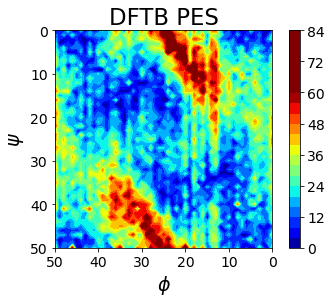

In [122]:
ndcaa = ndca - np.min(ndca)
ndcaa *= 96.42 
plt.contourf(ndcaa, 20,cmap='jet', vmin=0, vmax= 60)
ax=plt.gca()
ax.set_aspect('equal')
plt.title('DFTB PES')
plt.xlabel('$\phi$')
plt.ylabel('$\psi$')
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()
plt.colorbar()
plt.show()